# ITMAL
##  O1
**Gruppe 15**

**05-03-2012**
 
### Morten Haahr Kristensen
- **Studienummer: 2010960315**

### Thomas Holst Ulriksen
- **Studienummer: 201806733**

### Christoffer Fjord
- **Studienummer: 201805410**



# L01: Intro

This first section is about the intro exercise. These exercises is about settings and how we can work with ML in python. By the end of this exercise we have tried out different types of models, tweeked parameters and getted to know some basic elements in machine learning. 

The data we are using is about comparing peoples life satisfaction and GDP per capita.

The first section of code unsures that the jupyter notebook is able to run no matter the version of python. Futhermore is numpy and matplotlib imported to make sure is works as well.

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # ITMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

OK


In [3]:
import os
datapath = os.path.join("../datasets", "lifesat", "")

# NOTE: a ! prefix makes us able to run system commands..
! dir

print("\nOK")

 Volume in drive C is Windows-SSD
 Volume Serial Number is C25A-EC2D

 Directory of C:\Users\thoma\OneDrive - Aarhus Universitet\MAL (Machine Learning)\MAL\ASS01

05-03-2021  12:06    <DIR>          .
05-03-2021  12:06    <DIR>          ..
16-02-2021  16:06    <DIR>          .ipynb_checkpoints
05-03-2021  12:06         1.310.423 ass01.ipynb
25-02-2021  23:11    <DIR>          Data
25-02-2021  23:12    <DIR>          libdummymodule
25-02-2021  23:12    <DIR>          libitmal
               1 File(s)      1.310.423 bytes
               6 Dir(s)  421.860.843.520 bytes free

OK


### Code example 1-1 

In this section the data is imported, preprocessed and plotted. We are just running the codes..

In [4]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

OK


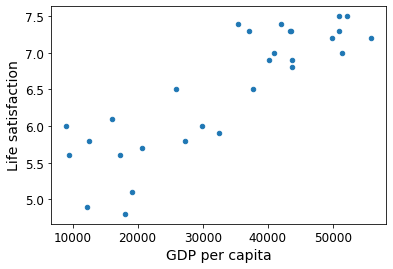

[[5.96242338]]
OK


In [5]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"ITMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

print("OK")

### ITMAL

The following section of code is for plotting the result of the linear regression.

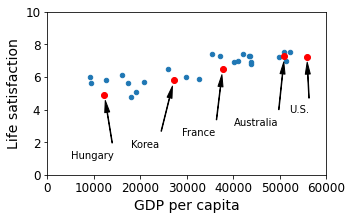

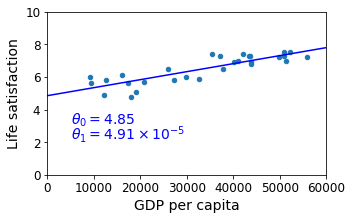

OK


In [6]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

print("OK")

In the above sections of code a model has been made, trained with the data and a single value has been predicted. The model is build on the concept of supervised learning, which mean when the model are trained we are supervising the model with correct answers to the data. The model is a linear regressor, which means it will predict values by a linear line as you can see in the grapha above. 

### Qa) The $\theta$ parameters and the $R^2$ Score

**In the linear regression model there is used som parameters called $\theta$, but how can these parameters be extracted from the model via the python attributes?**

$\theta_0$ can be seen on the figure as 4.85. As the model is a linear regression this is equivalent to our value b, when the first order polynomial is in the form $y = a\cdot x + b$. Furthermore $\theta_1 = 4.91\times 10^{-5}$ is the constant a.

**When we want to evaluate the model we are trying to find a score. One kind of score is $R^2$. What will this score say about the model? What is it's maximum and minimum? Is a low or high score best?**

$R^2$ (which is used as a score for the linear regression model) describes the how good the model is at predicting the correct output based on a given input.

*What are the minimum and maximum values for $R^2~$?* <br>
The best possible score for a linear regression model to achieve is $R^2$ = 1.0. I previously believed the worst was 0.0, but the Scikit-learn documentation says that a negative $R^2$ is possible.

*Is it best to have a low $R^2$ score or a high $R^2$ score? This means, is $R^2$ a loss/cost function or a function that measures of fitness/goodness?*<br>
It is better to have a higher $R^2$ score, which makes it a function that meassure fitness/goodness. The higher the better.


In [7]:
# Code answer Qa
t0 = lin1.predict([[0]])
t1 = lin1.coef_
print(f"\u03B8_0 = {t0}, \u03B8_1 = {t1}")

score = lin1.score(X,y)

θ_0 = [[4.8530528]], θ_1 = [[4.91154459e-05]]


## k-Nearest Neighbors model

The linear reggression model is far from the only type of model we can use in ML. The next model we try out is the k-nearest neighbor. When using Scikit-learn the model can be accessed from `sklearn.neighbors.KNeighborsRegressor`.

### Qb) Using k-Nearest Neighbors
We have used Cyprus to predict. So if we use the k-nearest neighbor model insted of the linear regressor, what value will it predict?

Is the score for a k-nearest neighbor the $R^2$ as well? Can you compare scores? Is it even possible to compare any scores when doing machine learning?


X.shape= (29, 1)
y.shape= (29, 1)


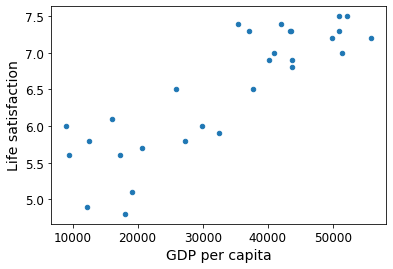

[[5.76666667]]
Score: 0.8525732853499179


In [8]:
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select and train a model
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
knn.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = knn.predict(X_new)
print(y_pred) # outputs [[ 5.77]]

# Score:
score = knn.score(X,y)
print(f"Score: {score}")

## k-Nearest Neighbors model

The linear reggression model is far from the only type of model we can use in ML. The next model we try out is the k-nearest neighbor. When using Scikit-learn the model can be accessed from `sklearn.neighbors.KNeighborsRegressor`.

### Qb) Using k-Nearest Neighbors
**We have used Cyprus to predict. So if we use the k-nearest neighbor model insted of the linear regressor, what value will it predict (it should yield =5.77)?**

As seen from the output above the knn model yields 5.77

**Is the score for a k-nearest neighbor the $R^2$ as well? Can you compare scores? Is it even possible to compare any scores when doing machine learning?**

From: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html?highlight=kneighborsregressor#sklearn.neighbors.KNeighborsRegressor <br>
K-nearest neighbor model also uses $R^2$ for meassuring the score. So the two models are very comparable. 

All kinds of scoring should all be directly comparable.

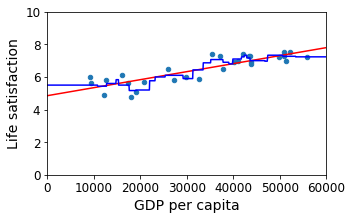

<Figure size 432x288 with 0 Axes>

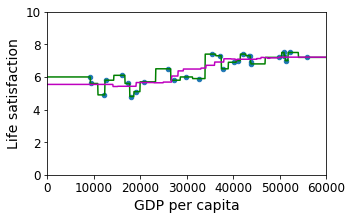

In [9]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = knn.predict(M)   # ASSUMING the variable name 'knn' of your KNeighborsRegressor 

# use plt.plot to plot x-y into the sample_data plot..
plt.figure(1)
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")

# TODO: add your code here..
plt.figure(2)
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

knn_low_neighbor = neighbors.KNeighborsRegressor(n_neighbors=1)
knn_low_neighbor.fit(X, y)
y_pred_knn_low_neighbor = knn_low_neighbor.predict(M)
plt.plot(m, y_pred_knn_low_neighbor, "g")

knn_high_neighbor = neighbors.KNeighborsRegressor(n_neighbors=7)
knn_high_neighbor.fit(X, y)
y_pred_knn_high_neighbor = knn_high_neighbor.predict(M)
plt.plot(m, y_pred_knn_high_neighbor, "m")

### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check

**If we set `k_neighbor = 1` then the model produces a `score = 1`. That seems awesome, because the score tell that the model the predict perfectly. But is it really that good?**

The nearest neighbor algorithm choses the output value based on the nearest training-data values similar to our input.<br>
Since we are measuring the score based on the same data we have trained our model with, there will always be a "perfect neighbor".
This however does **not** indicate that we have made a perfect model. If the score was measured on the test data we would receive different results.


**Explain why `k_neighbor = 1` will give such a good score for the model**

It has such a good score, because we are basing the score on the training-data and therefor there will always be an exact match.



**When the model produces a `score = 1` does this mean that it would be the prefered estimator?**

Nope not at all. The model doesn't predict anything. The output value is simply the closest value to our training-data.<br>
In a theoretical scenario where we had an infinite amount of training-data containing all possible values of x and their corresponding value of y it would be a pretty good model. But then again we wouldn't need ML if that was the case. :-)


## Neural Network

Now the goal is to try out a neural network, using the same fit-predict interface as above. We should preprocess and scale the data to get any sensible output, but at first the neural networks is fit-predicted without doing any further proprocessing or scaling of the data.

Iteration 1, loss = 290434295.23044360
Iteration 2, loss = 286926974.91845930
Iteration 3, loss = 283445091.80120462
Iteration 4, loss = 279989007.88284469
Iteration 5, loss = 276559070.05886549
Iteration 6, loss = 273155609.32856679
Iteration 7, loss = 269778940.07034004
Iteration 8, loss = 266429359.38609847
Iteration 9, loss = 263107146.52031821
Iteration 10, loss = 259812562.35816020
Iteration 11, loss = 256545849.00610605
Iteration 12, loss = 253307229.45747608
Iteration 13, loss = 250096907.34413809
Iteration 14, loss = 246915066.77466321
Iteration 15, loss = 243761872.25819018
Iteration 16, loss = 240637468.71230754
Iteration 17, loss = 237541981.55239332
Iteration 18, loss = 234475516.85906243
Iteration 19, loss = 231438161.61967900
Iteration 20, loss = 228429984.03930050
Iteration 21, loss = 225451033.91592684
Iteration 22, loss = 222501343.07455081
Iteration 23, loss = 219580925.85422322
Iteration 24, loss = 216689779.64216983
Iteration 25, loss = 213827885.44891003
Iteration

Iteration 289, loss = 773593.53955979
Iteration 290, loss = 748643.55483031
Iteration 291, loss = 724426.01212659
Iteration 292, loss = 700922.00126584
Iteration 293, loss = 678113.01264162
Iteration 294, loss = 655980.93150671
Iteration 295, loss = 634508.03225548
Iteration 296, loss = 613676.97270848
Iteration 297, loss = 593470.78840165
Iteration 298, loss = 573872.88688300
Iteration 299, loss = 554867.04201893
Iteration 300, loss = 536437.38831278
Iteration 301, loss = 518568.41523807
Iteration 302, loss = 501244.96158855
Iteration 303, loss = 484452.20984757
Iteration 304, loss = 468175.68057883
Iteration 305, loss = 452401.22684076
Iteration 306, loss = 437115.02862661
Iteration 307, loss = 422303.58733226
Iteration 308, loss = 407953.72025383
Iteration 309, loss = 394052.55511696
Iteration 310, loss = 380587.52463956
Iteration 311, loss = 367546.36112998
Iteration 312, loss = 354917.09112219
Iteration 313, loss = 342688.03004980
Iteration 314, loss = 330847.77696028
Iteration 31

Iteration 665, loss = 1.59371852
Iteration 666, loss = 1.59350440
Iteration 667, loss = 1.59330494
Iteration 668, loss = 1.59311916
Iteration 669, loss = 1.59294614
Iteration 670, loss = 1.59278504
Iteration 671, loss = 1.59263505
Iteration 672, loss = 1.59249543
Iteration 673, loss = 1.59236547
Iteration 674, loss = 1.59224453
Iteration 675, loss = 1.59213199
Iteration 676, loss = 1.59202729
Iteration 677, loss = 1.59192989
Iteration 678, loss = 1.59183929
Iteration 679, loss = 1.59175504
Iteration 680, loss = 1.59167670
Iteration 681, loss = 1.59160386
Iteration 682, loss = 1.59153615
Iteration 683, loss = 1.59147321
Iteration 684, loss = 1.59141472
Iteration 685, loss = 1.59136037
Iteration 686, loss = 1.59130986
Iteration 687, loss = 1.59126295
Iteration 688, loss = 1.59121937
Iteration 689, loss = 1.59117889
Iteration 690, loss = 1.59114130
Iteration 691, loss = 1.59110640
Iteration 692, loss = 1.59107399
Iteration 693, loss = 1.59104391
Iteration 694, loss = 1.59101598
Iteration 

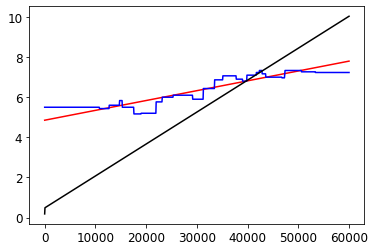

In [10]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor, can be very tricky for the tiny-data
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp.fit(X,y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) 
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

# TODO: add your code here..
x_cyprus = [[22587]]
y_cyprus = mlp.predict(x_cyprus)
print(f"MLP predict for Cyprus: {y_cyprus}")
score = mlp.score(X, y)
print(f"MLP Score: {score}")

### Qd) Trying out a Neural Network
Now we have tried to use a neural network for the ML model. The model used, is the `MLPRegressor` from Scikit-learns Multi-Layer Perceptron for regression. 

**Is it right to compare the score with the linear and KNN-scores?**

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html?highlight=mlp#sklearn.neural_network.MLPRegressor <br>
Score returned -3.6741. It also uses $R^2$ to meassure the score, so it can be compared. The model is simply so bad that it has a negative score.

### Qe) Neural Network with pre-scaling

Now the data is scaled before training the model. We are using the interp function to scale the data from 0 to 1. 

**Is the model doing any better?**

If only the score is evaluated, then this MLP model is better with a `MLP score = 0.7243` which is significantly bad. We would still mark this model being useless. The graph below is alarming and thats makes us happy that this exercise is optional. We are not sure the the data is scaled correct.

[[0.        ]
 [0.00818087]
 [0.06812749]
 [0.07359142]
 [0.1483803 ]
 [0.17610947]
 [0.19271269]
 [0.21532867]
 [0.249786  ]
 [0.35956583]
 [0.38802504]
 [0.44516659]
 [0.50118686]
 [0.5623157 ]
 [0.59871237]
 [0.61219068]
 [0.66420375]
 [0.68323848]
 [0.70414695]
 [0.73319432]
 [0.73899437]
 [0.74158079]
 [0.74257879]
 [0.87296468]
 [0.89410502]
 [0.89639981]
 [0.90471802]
 [0.92104778]
 [1.        ]]
Iteration 1, loss = 22.38270268
Iteration 2, loss = 22.35962476
Iteration 3, loss = 22.33650576
Iteration 4, loss = 22.31334508
Iteration 5, loss = 22.29014210
Iteration 6, loss = 22.26689622
Iteration 7, loss = 22.24360680
Iteration 8, loss = 22.22025040
Iteration 9, loss = 22.19660517
Iteration 10, loss = 22.17290475
Iteration 11, loss = 22.14915076
Iteration 12, loss = 22.12534422
Iteration 13, loss = 22.10148571
Iteration 14, loss = 22.07757558
Iteration 15, loss = 22.05361396
Iteration 16, loss = 22.02960084
Iteration 17, loss = 22.00553612
Iteration 18, loss = 21.98141962
Iteratio

Iteration 377, loss = 9.47040857
Iteration 378, loss = 9.43261209
Iteration 379, loss = 9.39486460
Iteration 380, loss = 9.35716751
Iteration 381, loss = 9.31952212
Iteration 382, loss = 9.28192964
Iteration 383, loss = 9.24439118
Iteration 384, loss = 9.20690779
Iteration 385, loss = 9.16948043
Iteration 386, loss = 9.13211004
Iteration 387, loss = 9.09479744
Iteration 388, loss = 9.05754346
Iteration 389, loss = 9.02034885
Iteration 390, loss = 8.98321433
Iteration 391, loss = 8.94614057
Iteration 392, loss = 8.90912823
Iteration 393, loss = 8.87217791
Iteration 394, loss = 8.83529021
Iteration 395, loss = 8.79846570
Iteration 396, loss = 8.76170490
Iteration 397, loss = 8.72500835
Iteration 398, loss = 8.68837655
Iteration 399, loss = 8.65180997
Iteration 400, loss = 8.61530910
Iteration 401, loss = 8.57887438
Iteration 402, loss = 8.54250627
Iteration 403, loss = 8.50620519
Iteration 404, loss = 8.46997156
Iteration 405, loss = 8.43380581
Iteration 406, loss = 8.39770832
Iteration 

Iteration 800, loss = 0.76044043
Iteration 801, loss = 0.75544290
Iteration 802, loss = 0.75048771
Iteration 803, loss = 0.74557458
Iteration 804, loss = 0.74070326
Iteration 805, loss = 0.73587347
Iteration 806, loss = 0.73108494
Iteration 807, loss = 0.72633740
Iteration 808, loss = 0.72163060
Iteration 809, loss = 0.71696425
Iteration 810, loss = 0.71233810
Iteration 811, loss = 0.70775189
Iteration 812, loss = 0.70320534
Iteration 813, loss = 0.69869819
Iteration 814, loss = 0.69423019
Iteration 815, loss = 0.68980107
Iteration 816, loss = 0.68541057
Iteration 817, loss = 0.68105843
Iteration 818, loss = 0.67674439
Iteration 819, loss = 0.67246820
Iteration 820, loss = 0.66822958
Iteration 821, loss = 0.66402830
Iteration 822, loss = 0.65986409
Iteration 823, loss = 0.65573669
Iteration 824, loss = 0.65164586
Iteration 825, loss = 0.64759134
Iteration 826, loss = 0.64357287
Iteration 827, loss = 0.63959021
Iteration 828, loss = 0.63564310
Iteration 829, loss = 0.63173130
Iteration 

Iteration 1180, loss = 0.24818118
Iteration 1181, loss = 0.24803049
Iteration 1182, loss = 0.24788051
Iteration 1183, loss = 0.24773124
Iteration 1184, loss = 0.24758267
Iteration 1185, loss = 0.24743478
Iteration 1186, loss = 0.24728757
Iteration 1187, loss = 0.24714102
Iteration 1188, loss = 0.24699513
Iteration 1189, loss = 0.24684989
Iteration 1190, loss = 0.24670529
Iteration 1191, loss = 0.24656132
Iteration 1192, loss = 0.24641797
Iteration 1193, loss = 0.24627522
Iteration 1194, loss = 0.24613308
Iteration 1195, loss = 0.24599154
Iteration 1196, loss = 0.24585058
Iteration 1197, loss = 0.24571019
Iteration 1198, loss = 0.24557037
Iteration 1199, loss = 0.24543112
Iteration 1200, loss = 0.24529241
Iteration 1201, loss = 0.24515425
Iteration 1202, loss = 0.24501662
Iteration 1203, loss = 0.24487952
Iteration 1204, loss = 0.24474294
Iteration 1205, loss = 0.24460687
Iteration 1206, loss = 0.24447131
Iteration 1207, loss = 0.24433624
Iteration 1208, loss = 0.24420167
Iteration 1209

Iteration 1566, loss = 0.20570236
Iteration 1567, loss = 0.20560278
Iteration 1568, loss = 0.20550323
Iteration 1569, loss = 0.20540370
Iteration 1570, loss = 0.20530419
Iteration 1571, loss = 0.20520472
Iteration 1572, loss = 0.20510526
Iteration 1573, loss = 0.20500583
Iteration 1574, loss = 0.20490643
Iteration 1575, loss = 0.20480705
Iteration 1576, loss = 0.20470770
Iteration 1577, loss = 0.20460838
Iteration 1578, loss = 0.20450908
Iteration 1579, loss = 0.20440980
Iteration 1580, loss = 0.20431055
Iteration 1581, loss = 0.20421133
Iteration 1582, loss = 0.20411213
Iteration 1583, loss = 0.20401296
Iteration 1584, loss = 0.20391381
Iteration 1585, loss = 0.20381469
Iteration 1586, loss = 0.20371559
Iteration 1587, loss = 0.20361652
Iteration 1588, loss = 0.20351748
Iteration 1589, loss = 0.20341847
Iteration 1590, loss = 0.20331947
Iteration 1591, loss = 0.20322051
Iteration 1592, loss = 0.20312157
Iteration 1593, loss = 0.20302266
Iteration 1594, loss = 0.20292377
Iteration 1595

Iteration 1957, loss = 0.16918495
Iteration 1958, loss = 0.16909903
Iteration 1959, loss = 0.16901316
Iteration 1960, loss = 0.16892733
Iteration 1961, loss = 0.16884154
Iteration 1962, loss = 0.16875580
Iteration 1963, loss = 0.16867010
Iteration 1964, loss = 0.16858445
Iteration 1965, loss = 0.16849884
Iteration 1966, loss = 0.16841327
Iteration 1967, loss = 0.16832775
Iteration 1968, loss = 0.16824227
Iteration 1969, loss = 0.16815684
Iteration 1970, loss = 0.16807145
Iteration 1971, loss = 0.16798611
Iteration 1972, loss = 0.16790081
Iteration 1973, loss = 0.16781556
Iteration 1974, loss = 0.16773034
Iteration 1975, loss = 0.16764518
Iteration 1976, loss = 0.16756006
Iteration 1977, loss = 0.16747498
Iteration 1978, loss = 0.16738995
Iteration 1979, loss = 0.16730496
Iteration 1980, loss = 0.16722002
Iteration 1981, loss = 0.16713512
Iteration 1982, loss = 0.16705027
Iteration 1983, loss = 0.16696546
Iteration 1984, loss = 0.16688070
Iteration 1985, loss = 0.16679598
Iteration 1986

Iteration 2336, loss = 0.14005183
Iteration 2337, loss = 0.13998465
Iteration 2338, loss = 0.13991753
Iteration 2339, loss = 0.13985045
Iteration 2340, loss = 0.13978344
Iteration 2341, loss = 0.13971647
Iteration 2342, loss = 0.13964956
Iteration 2343, loss = 0.13958270
Iteration 2344, loss = 0.13951589
Iteration 2345, loss = 0.13944914
Iteration 2346, loss = 0.13938244
Iteration 2347, loss = 0.13931580
Iteration 2348, loss = 0.13924921
Iteration 2349, loss = 0.13918267
Iteration 2350, loss = 0.13911618
Iteration 2351, loss = 0.13904975
Iteration 2352, loss = 0.13898337
Iteration 2353, loss = 0.13891705
Iteration 2354, loss = 0.13885078
Iteration 2355, loss = 0.13878456
Iteration 2356, loss = 0.13871839
Iteration 2357, loss = 0.13865228
Iteration 2358, loss = 0.13858622
Iteration 2359, loss = 0.13852022
Iteration 2360, loss = 0.13845427
Iteration 2361, loss = 0.13838837
Iteration 2362, loss = 0.13832253
Iteration 2363, loss = 0.13825674
Iteration 2364, loss = 0.13819100
Iteration 2365

Iteration 2703, loss = 0.11901156
Iteration 2704, loss = 0.11896409
Iteration 2705, loss = 0.11891667
Iteration 2706, loss = 0.11886930
Iteration 2707, loss = 0.11882199
Iteration 2708, loss = 0.11877473
Iteration 2709, loss = 0.11872752
Iteration 2710, loss = 0.11868037
Iteration 2711, loss = 0.11863327
Iteration 2712, loss = 0.11858621
Iteration 2713, loss = 0.11853922
Iteration 2714, loss = 0.11849227
Iteration 2715, loss = 0.11844538
Iteration 2716, loss = 0.11839854
Iteration 2717, loss = 0.11835175
Iteration 2718, loss = 0.11830501
Iteration 2719, loss = 0.11825833
Iteration 2720, loss = 0.11821170
Iteration 2721, loss = 0.11816512
Iteration 2722, loss = 0.11811860
Iteration 2723, loss = 0.11807212
Iteration 2724, loss = 0.11802570
Iteration 2725, loss = 0.11797933
Iteration 2726, loss = 0.11793301
Iteration 2727, loss = 0.11788675
Iteration 2728, loss = 0.11784054
Iteration 2729, loss = 0.11779438
Iteration 2730, loss = 0.11774827
Iteration 2731, loss = 0.11770221
Iteration 2732

Iteration 3067, loss = 0.10505401
Iteration 3068, loss = 0.10502431
Iteration 3069, loss = 0.10499465
Iteration 3070, loss = 0.10496504
Iteration 3071, loss = 0.10493548
Iteration 3072, loss = 0.10490596
Iteration 3073, loss = 0.10487648
Iteration 3074, loss = 0.10484704
Iteration 3075, loss = 0.10481765
Iteration 3076, loss = 0.10478830
Iteration 3077, loss = 0.10475900
Iteration 3078, loss = 0.10472974
Iteration 3079, loss = 0.10470052
Iteration 3080, loss = 0.10467135
Iteration 3081, loss = 0.10464222
Iteration 3082, loss = 0.10461314
Iteration 3083, loss = 0.10458410
Iteration 3084, loss = 0.10455510
Iteration 3085, loss = 0.10452614
Iteration 3086, loss = 0.10449723
Iteration 3087, loss = 0.10446836
Iteration 3088, loss = 0.10443954
Iteration 3089, loss = 0.10441076
Iteration 3090, loss = 0.10438202
Iteration 3091, loss = 0.10435332
Iteration 3092, loss = 0.10432467
Iteration 3093, loss = 0.10429606
Iteration 3094, loss = 0.10426750
Iteration 3095, loss = 0.10423897
Iteration 3096

Iteration 3466, loss = 0.09633184
Iteration 3467, loss = 0.09631689
Iteration 3468, loss = 0.09630197
Iteration 3469, loss = 0.09628708
Iteration 3470, loss = 0.09627221
Iteration 3471, loss = 0.09625738
Iteration 3472, loss = 0.09624258
Iteration 3473, loss = 0.09622780
Iteration 3474, loss = 0.09621306
Iteration 3475, loss = 0.09619834
Iteration 3476, loss = 0.09618366
Iteration 3477, loss = 0.09616900
Iteration 3478, loss = 0.09615437
Iteration 3479, loss = 0.09613978
Iteration 3480, loss = 0.09612521
Iteration 3481, loss = 0.09611067
Iteration 3482, loss = 0.09609615
Iteration 3483, loss = 0.09608167
Iteration 3484, loss = 0.09606722
Iteration 3485, loss = 0.09605279
Iteration 3486, loss = 0.09603840
Iteration 3487, loss = 0.09602403
Iteration 3488, loss = 0.09600969
Iteration 3489, loss = 0.09599538
Iteration 3490, loss = 0.09598110
Iteration 3491, loss = 0.09596685
Iteration 3492, loss = 0.09595263
Iteration 3493, loss = 0.09593843
Iteration 3494, loss = 0.09592427
Iteration 3495

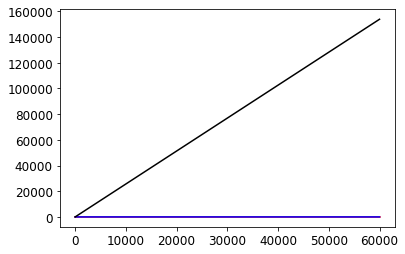

In [11]:
X = np.interp(X, (X.min(), X.max()), (0, +1))
print(X)
# Setup MLPRegressor, can be very tricky for the tiny-data
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp.fit(X,y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) 
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
mld_y_pred = mlp.predict(X_new)
print(f'Prediction for Cyprus = {mld_y_pred}') # outputs [[ 5.96242338]]
print(f'MLP score = {mlp.score(X, y)}')

# L01: Modules and Classes

L01: Modules and Classes consisted of getting familiar with Python and learning how to use modules and classes.<br>
During the exercise we will be writing our own module and classes.

### Qa) Using a local module (`libitmal`)

For this part of the assignment we will be using the module `libitmal` which is provided as part of the course.<br>
It is assumed that the module directory has been successfully added to the `PYTHONPATH`. On Linux this can be done by running `export PYTHONPATH="<module-dir>:$PYTHONPATH"`. If a `venv` is being used this can be added to the `activate` script.

The assignment consisted of running the `utils.TestAll()` function from the `libitmal` library. The function has been successfully ran below.

In [12]:

from libitmal import utils
utils.TestAll()

TestPrintMatrix...(no regression testing)
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
X=[[ 1.  2.]
   ...
   [ 1. -1.]]
X=[[   1.
       2.    ]
   [   3.0001
    -100.    ]
   [   1.
      -1.    ]]
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
OK
TEST: OK
ALL OK


### Qb) Custom module developed by us

In this exercise a new module had to be created and tested with dummy functionality.<br>
This was achieved by creating a new folder called `libdummymodule`, adding an empty `__init__.py` file. This module was added to the `PYTHONPATH` like in exercise Qa.<br>
An extra file called `hello_world` was made which included a function: `hello_world(number)`. From the docstring of the function it can be read that the function prints "Hello, World!" `number` amount of times.

The function is tested below.

In [13]:
from libdummymodule.hello_world import hello_world
hello_world(2)

Hello, World!
Hello, World!


### Qc) Making changes to a module


Jupyter does not "recompile" the modules every time it is used in a cell-code. Instead it uses a cached version of it. Question c asked how one can force a recompilation of a module for situations where the module had been changed.

The method we found the easiest was to simply restart the Jupyter kernel by pressing the restart symbol in the top menu. However, there are also some "magic lines" that ships with IPython¹ that can be used to reload a given module when a code cell is ran.


-------------------
¹ IPython is a dependency that Jupyter ships with.

### Qd) How to write a module

Question d asked to write a small how-to guide on how modules in Python works.

1. Make sure the path you're creating the module in is in your `$PYTHONPATH`
    * If using a venv you can add `export PYTHONPATH="<module-dir>":$PYTHONPATH` at the bottom of your .venv/activate file.
1. Create the folder and an empty file called __init__.py
1. Write your files.


### Qe) Extending a class

The first part of question e consisted on answering some questions.

The first question regarded how private functions and member variables can be represented in Python:<br>
Private does not exist in Python. Instead there is a convention of adding `__` as a prefix of the method or member variable. If trying to access a method or member variable prefixed with `__` an `AttributeError` will be raised.

The second question consisted of defining `self` in Python classes:<br>
It's a reference to the specific instance of the class. Comparable to the `this` pointer in C++.

The last question consisted of answering what might happen if one forgets `self` in the parameter list of a function in a class. <br>
It becomes a static function. See `my_static_fun()` below.

The second part of question e consisted of extending a very simple class with some extra functionality. Some private and public members and functions had to be added.


In [14]:
class MyClass:
    myvar = "blah"
    __priv_var = "I can't stop you from using this var, but you probably shouldn't."

    def __priv_fun(self):
        print("I can't stop you from using this function, but you probably shouldn't.")

    def fun(self):
        print("This is a message inside the class.")

    def static_fun():
        print("I cannot be called from an instantiated object.")

    def get_priv_var(self):
        return MyClass.__priv_var

myobjectx = MyClass() # Making new obj
myobjectx.fun() # Calling member function

try:
    myobjectx.static_fun() # Trying to call static func on instantiated object raises error
except TypeError as e:
    print(f"TypeError: {e}")

MyClass.static_fun() # Calling static func correctly.

print(myobjectx.myvar) # printing public object

try:
    print(myobjectx.__priv_var) # Trying to print private member variable raises error
except AttributeError as e:
    print(f"AttributeError: {e}")

print(myobjectx.get_priv_var()) # Getting a private member variable.

try:
    myobjectx.__priv_fun() # Trying to call private func raises error
except AttributeError as e:
    print(f"AttributeError: {e}")


This is a message inside the class.
TypeError: static_fun() takes 0 positional arguments but 1 was given
I cannot be called from an instantiated object.
blah
AttributeError: 'MyClass' object has no attribute '__priv_var'
I can't stop you from using this var, but you probably shouldn't.
AttributeError: 'MyClass' object has no attribute '__priv_fun'


### Qf) Python constructors
For this exercise the class from exercise Qe will be extended further. A constructor will be added by adding the `__init__` function.

The exercise also asks whether or not destructors exist in Python and what purpose they might have.<br>
In Python the destructors do exist but are not used as much as in C++. In C++ destructors are usually used for de-allocating dynamically allocated memory. Pythons garbage collection handles this automatically. It is however possible to specify a `__del__` function to add destructor functionality, but it is not as widely used.


In [15]:
class MyBetterClass(MyClass): # Extending the class (inheritance)
    def __init__(self):
        print("I now have a CTOR!!!")

my_better_object = MyBetterClass()

I now have a CTOR!!!


### Qg) String functionality

This exercise asks to extend the class even further by adding a `to_string` functionality to our class as it is known in C++ and C#. This is done through the `__str__` function. Se code cell below.

In [16]:
class EvenBetterClass(MyBetterClass):
    def __str__(self): # String representation. 
        return "I am the string representation of an even better class!"

my_even_better_object = EvenBetterClass()
print(my_even_better_object)

I now have a CTOR!!!
I am the string representation of an even better class!


# L02: Cost function

$$
  \newcommand\norm[1]{{\cal L}_{#1}}
$$

### Qa) Given matrix $\mathbf{x}^{(i)}$'s, create and print the transposed matrix ($\mathbf X$) in python.

We have constructed the matrix using the NumPy library. 

In [17]:
import numpy as np

y = np.array([1,2,3,4]) # NOTE:  you'll need this later

X = np.array([[1, 2, 3], [4, 2, 1], [3, 8, 5], [-9, -1, 0]])

print('Matrix X:')
print(X)

Matrix X:
[[ 1  2  3]
 [ 4  2  1]
 [ 3  8  5]
 [-9 -1  0]]


### Qb) Create $\norm{1}$ and $\norm{2}$ norms as functions in python.
#### a) The implementations of $\norm{1}$ and $\norm{2}$ may only use 'low-level' operators. And test your implementation against a built-in function.

We have implemented the L1 and L2 function using ‘low-level’ operators, this means that we cannot use any python math or NumPy functions like sum or sqrt. Instead, we have used Pythons ** operator which used to get the power of a number to perform the sqrt operation. Instead of using sum we created a for loop that loops though the array, which is a very in effective way of calculation the sum of an array.


In [18]:
import numpy as np

def L1(vector):
    valid_types = (list, np.ndarray)
    if not isinstance(vector, valid_types):
        raise ValueError('input must be list or np.array')

    s = 0
    for i in vector:
        if isinstance(i, valid_types):
            raise ValueError('N-dimensional arrays not supported')

        s += ((i) ** 2) ** 0.5
    return s

def L2(vector):
    valid_types = (list, np.ndarray)
    if not isinstance(vector, valid_types):
        raise ValueError('input must be list or np.array')

    s = 0
    for i in vector:
        if isinstance(i, valid_types):
            raise ValueError('N-dimensional arrays not supported')
        
        s += (i ** 2)
    return s ** 0.5

tx=np.array([1, 2, 3, -1])
ty=np.array([3,-1, 4,  1])

expected_d1 = np.linalg.norm(tx-ty, ord=1)
expected_d2 = np.linalg.norm(tx-ty, ord=2)

d1=L1(tx-ty)
d2=L2(tx-ty)

print(f"tx-ty={tx-ty}, d1-expected_d1={d1-expected_d1}, d2-expected_d2={d2-expected_d2}")

eps=1E-9
assert np.fabs(d1-expected_d1)<eps, "L1 dist seems to be wrong" 
assert np.fabs(d2-expected_d2)<eps, "L2 dist seems to be wrong" 

print('OK')

tx-ty=[-2  3 -1 -2], d1-expected_d1=0.0, d2-expected_d2=0.0
OK


#### b) Create a pythonic implementation of $\norm{2}$ that uses numpy's dot method.
This time we create a more pythonic implementation of the code using the dot and sqrt method found in NumPy


In [19]:
def L2Dot(vector):
    if not isinstance(vector, (list, np.ndarray)):
        raise ValueError('input must be list or np.array')

    s = np.dot(vector, vector)
    return np.sqrt(s)

d2dot = L2Dot(tx-ty)
print("d2dot-expected_d2=", d2dot-expected_d2)
assert np.fabs(d2dot-expected_d2)<eps, "L2Ddot dist seem to be wrong" 

print('OK')

d2dot-expected_d2= 0.0
OK


### Qc) Create a Root Mean Square Error (RMSE) function in Python.
We have created a RMSE function using low level operator, here we reused our code from the L2 norm function that we created earlier. Here we divided by the array length and found the square root, to find the RMSE.

In [20]:
def RMSE(h, y):
    if len(h) != len(y):
        raise ValueError('Vectors must be same length')
    
    if not isinstance(h, (list, np.ndarray)):
        raise ValueError('Input must be list or np.ndarray')

    if not isinstance(y, (list, np.ndarray)):
        raise ValueError('Input must be list or np.ndarray')

    return L2(h-y) * (1 / len(h)) ** 0.5

# Dummy h function:
def h(X):    
    if X.ndim!=2:
        raise ValueError("excpeted X to be of ndim=2, got ndim=",X.ndim)
    if X.shape[0]==0 or X.shape[1]==0:
        raise ValueError("X got zero data along the 0/1 axis, cannot continue")
    return X[:,0]

r=RMSE(h(X),y)

# TEST vector:
eps=1E-9
expected=6.57647321898295
print(f"RMSE={r}, diff={r-expected}")
assert np.fabs(r-expected)<eps, "your RMSE dist seems to be wrong" 

print('OK')

RMSE=6.576473218982953, diff=2.6645352591003757e-15
OK


### Qd) Create the Mean Absolute Error (MAE) function in Python.
This time we reused the L1 norm function from before and took the mean of that in order to get the Mean Absolute Error.

In [21]:
def MAE(h, y):
    if len(h) != len(y):
        raise ValueError('Vectors must be same length')
    
    if not isinstance(h, (list, np.ndarray)):
        raise ValueError('Input must be list or np.ndarray')

    if not isinstance(y, (list, np.ndarray)):
        raise ValueError('Input must be list or np.ndarray')
    return 1 / len(h) * L1(h-y)

r = MAE(h(X), y)

# TEST vector:
expected=3.75
print(f"MAE={r}, diff={r-expected}")
assert np.fabs(r-expected)<eps, "MAE dist seems to be wrong" 

print('OK')

MAE=3.75, diff=0.0
OK


### Qe) Robust Code 
We went back an added error handling to all functions made in the exercise. We added some code that check is the values give to the functions is the correct type, because you cannot define what type of input a function takes in Python which makes it possible to pass any type to any given function. The code will fail at some point when incorrect data types are given, by checking early on we avoid spending compute time starting on some calculations that might not be able to finish due to incorrect types. This is done by raise errors because it makes it possible for the programmer to handle the error in a try except block. Rather than asserting which will stop the program. 

### Qf) Conclusion on the ML concepts used in this exercise.

We have in this exercise worked with different norms which are used in cost functions. We have gained insights in the functions inner workings by implementing them using “low-level” operators in Python. 
<br> <br>
After implementing $\norm{1}$ and $\norm{2}$ we used them to create MAE and RMSE cost functions, this taught us about the relationship between norms and cost functions and the math behind them. This granted us insight in when to use which function in feature ML-exercises.
<br> <br>
Lastly, we tried out implementing error handling to write more robust Python code. This will help us down the road catching errors before executing code with long run time.


# L02: Dummy classifier

### Qa) Load and display the MNIST data
We have loaded the MNIST dataset using the sklearn fetch function, ensured it was in NumPy arrays and normalized it. Afterwards we plotted the first number in the dataset.

Max value in X is 255.0
Max value in X after scaling is 1.0


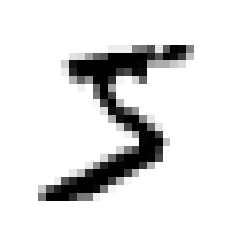

In [2]:
from sklearn.datasets import fetch_openml
from pandas import DataFrame
import numpy as np

X, y = fetch_openml('mnist_784', return_X_y=True)
if(type(X) == type(DataFrame())):
    X = X.to_numpy()
    y = y.to_numpy()
print(f"Max value in X is {np.max(X)}")

X = X / 255
print(f"Max value in X after scaling is {np.max(X)}")

def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

MNIST_PlotDigit(X[0])

### Qb) Create a Stochastic Gradient Decent (SGD) Classifier.
#### a) Split the dataset into testing and traning sets. And train and test the model.
In order to make a binary 5 classifier we create a new ground truth array where all 5’s is true and all other numbers are false.
<br>
We split the data into training and test dataset with a test size of 33%. This was done to avoid overfitting the model. Afterwards we created a SGD classifier that does a 1000 training  iterations or until the improvement is less than 1e-3. <br>
After training the classifier it scored above 90% which seams grate.

In [23]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

ground_true = (y == '5') 
X_train, X_test, y_train, y_test = train_test_split(X, ground_true, test_size=0.33, random_state=1)

clf = SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print(f'SGD Classifier score: {score}')

SGD Classifier score: 0.973030303030303


#### b) Plot a number that has been correctly categorized and one that has not.
The 5 underneath was predicted correctly

Model prediction, is this the number 5?
SGD anwser: True


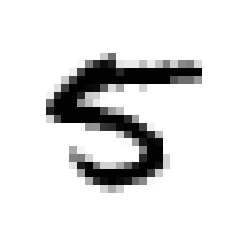

In [24]:
pred = clf.predict(X_test)

# Correct classified
MNIST_PlotDigit(X_test[3])
print(f'Model prediction, is this the number 5?\nSGD anwser: {pred[3]}')

The 7 plotted underneath as predicted to be a 5 which is wrong

Model prediction, is this the number 5?
SGD anwser: True


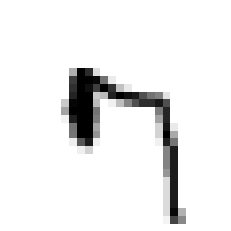

In [25]:
# Misclassified 
misclassified = np.where(y_test != pred)
MNIST_PlotDigit(X_test[misclassified[0][0]])
print(f'Model prediction, is this the number 5?\nSGD anwser: {pred[misclassified[0][0]]}')

### Qc) Implement a dummy binary classifier
#### a) Create a Dummy binary classifier that inherits from BaseEstimator and ClassifierMixin from Scikit-learn.
By inhering from *BaseEstimator* and *ClassifierMixin* we created a *DummyClassifier* that is compatible with the sklearn library. What makes this a dummy is that the fit does nothing and the predict function always answer false. 

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin

class DummyClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        pass

    def predict(self, X):
        return [False for _ in range(len(X))]

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return accuracy_score(y_test, y_pred)

#### b) Compare the accuracy score to the DummyClassifier from [HOML] p. 89, how do they compare?

In [27]:
dc = DummyClassifier()
dc.fit(X_test, y_test)
s = dc.score(X_test, y_test)
print(f'DummyClassifier socre: {s}')

DummyClassifier socre: 0.9085281385281385


In [HOML] the score is between 0.907 - 0.912, which is very similar to our score. The difference can be related to the randomness when dividing the data into folds.

### Qd) Conclusion Conclude the most important ML-concepts you learned in this exercise.
This exercise taught us how to import open-source datasets and splitting them in training and test folds for ML development. We were also granted insight in how to create a classifier class to use with the rest of the Scikit-learn module. 
<br> <br>
This exercise also taught us that it is important to know if your data set is skewed. Because it can lead to false hope when testing your model. This was the case when trying to create a binary classifier on the MNST dataset because it contains an even number of pictures for each number. This was the reason why our DummyClassifier god a good score by always predicting false. 



# L02: Performance metrics

In this chapter we are looking at different metrics used in Machine Learning. These metrics can be called performance metric, but performance score could be a better name to capture the understanding. 

### Qa) Implement the Accuracy function and test it on the MNIST data.

In the following code sections we are implementing the accuracy function from scratch. Then it's compared to the accuracy function from Scikit-learn imported from `sklearn.metrics`. The functions will be tested on the MNIST data, which is drawed digit from 0-9.

By comparing our own accuracy function with Scikit-learns implementation it happens that the result are equal, therefor MyAccuracy must work as supposed.

In [49]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

# ----------------------SGD-------------------------
X, y = fetch_openml('mnist_784', return_X_y=True)
X = X / 255

ground_true = (y == '5')
X_train, X_test, y_train, y_test = train_test_split(X, ground_true, test_size=0.33, random_state=1)

clf = SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print(score)

y_pred = clf.predict(X_test)

# --------------------DUMMY-------------------------
from sklearn.base import BaseEstimator, ClassifierMixin

class DummyClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        pass

    def predict(self, X):
        return [False for _ in range(len(X))]

dc = DummyClassifier()
dc.fit(X_test, y_test)

y_predDC = dc.predict(X_test)

0.9738961038961039


In [50]:
from sklearn.metrics import accuracy_score
from numpy import fabs

# Accuracy function from scratch
def MyAccuracy(y_true, y_pred, normalize=True):
    score = 0
    for yt,yp in zip(y_true, y_pred):
        if yt == yp:
            score += 1
    return score / len(y_true) if normalize else score
    
# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
def TestAccuracy(y_true, y_pred):
    a0=MyAccuracy(y_true, y_pred)
    a1=accuracy_score(y_true, y_pred)

    print(f"\nmy a          ={a0}")
    print(f"scikit-learn a={a1}")

    # do some numerical comparison here, like
    eps = 1E-9
    assert fabs(a0-a1)<eps, "MyAccuracy precission error"
        

TestAccuracy(y_test, y_pred)
TestAccuracy(y_test, y_predDC)


my a          =0.9738961038961039
scikit-learn a=0.9738961038961039

my a          =0.9085281385281385
scikit-learn a=0.9085281385281385


### Qb) Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

The approch of the exercise is quite similar to Qa. We implement the function to calculate precision, recall and the $F_1$-score from scratch and compare them to Scikit-learns similar functions. 

Our implemented function gives equal results to Scikit-learns functions.

To avoid dividing with zero, an if-statement simply check is it's dividing with zero. It seams like Scikit-learns functions are returning zero  when the denominator is zero as well. 

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score

def MyPrecision(y_true, y_pred):
    TP_FP = 0
    TP = 0
    for yt, yp in zip(y_true, y_pred):
        if yp:
            if yt == yp:
                TP += 1
            TP_FP += 1
    return TP/TP_FP if TP_FP != 0 else 0

def MyRecall(y_true, y_pred):
    TP = 0
    FN = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp and yp:
            TP += 1
        if yt != yp and yt:
            FN += 1
    return TP/(FN+TP) if (FN+TP) != 0 else 0
    
def MyF1Score(y_true, y_pred):
    precision = MyPrecision(y_true, y_pred)
    recall = MyRecall(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print("Precision SGD:")
print(MyPrecision(y_test, y_pred))
print(precision_score(y_test, y_pred))
print("Recall SGD:")
print(recall_score(y_test, y_pred))
print(MyRecall(y_test, y_pred))
print("F1 Score SGD:")
print(MyF1Score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print()
print("Precision Dummy Classifier:")
print(MyPrecision(y_test, y_predDC))
print(precision_score(y_test, y_predDC))
print("Recall Dummy Classifier:")
print(recall_score(y_test, y_predDC))
print(MyRecall(y_test, y_predDC))
print("F1 Score Dummy Classifier:")
print(MyF1Score(y_test, y_predDC))
print(f1_score(y_test, y_predDC))

Precision SGD:
0.8730237154150198
0.8730237154150198
Recall SGD:
0.836251774727875
0.836251774727875
F1 Score SGD:
0.8542422044960116
0.8542422044960116

Precision Dummy Classifier:
0
0.0
Recall Dummy Classifier:
0.0
0.0
F1 Score Dummy Classifier:
0
0.0


### Qc) The Confusion Matrix


Now by importing `sklearn.metrics.confusion_matrix` we can make the confusion matrix for the the earlier used Dummy and SGD classifiers. 

The printout for the code section below shows how the confusion matrix are organized. This is shown here in the following figure. 

$$   
{\bf M}\st{confusion} = 
\begin{array}{|l|ll|}
    \hline
    TN & FP \\\hline  
    FN & TP \\\hline
\end{array}
$$

If the parameters is changed when calling `confusion_matrix`, it can be seen that FP and FN has changed places. It depends on your system if this change is critical.

In [31]:
from sklearn.metrics import confusion_matrix

M_dummy = confusion_matrix(y_test, y_predDC)
M_SDGwrong = confusion_matrix(y_pred, y_test)
M_SDG = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Dummy:")
print(M_dummy)
print()
print("SDG Wrong:")
print(M_SDGwrong)
print()
print("SDG:")
print(M_SDG)
print()
print("TN: " + str(tn))
print("FP: " + str(fp))
print("FN: " + str(fn))
print("TP: " + str(tp))

Dummy:
[[20987     0]
 [ 2113     0]]

SDG Wrong:
[[20745   389]
 [  242  1724]]

SDG:
[[20745   242]
 [  389  1724]]

TN: 20745
FP: 242
FN: 389
TP: 1724


### Qd) A Confusion Matrix Heat-map

This heat-map is a way to visualize the confusion matrix. To make the heat-map inspiration is found in [HOML].

The data is normalized to give a heat-map which is easier to read. If not normalized, the lower values as in FP, FN and TP will barely have a different color because of TN which is significantly larger than the others. 

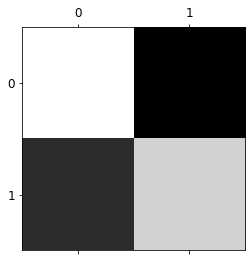

White displays high values and black displays low values
The Matrit is normalized

[True Negative]		[False Positive]
[False Negative]	[True Positve]


In [32]:
import matplotlib.pyplot as plt

row_sums = M_SDG.sum(axis=1, keepdims=True)
norm_M_SDG = M_SDG / row_sums

plt.matshow(norm_M_SDG, cmap = plt.cm.gray)
plt.show()

print("White displays high values and black displays low values")
print("The Matrit is normalized")
print()
print("[True Negative]\t\t[False Positive]")
print("[False Negative]\t[True Positve]")

### Qe) Conclusion

We have tried to make functions to calculate performance scores by ourself and how the scores shows how well the model performs. We have gained insight in how confusion matrix works and how we can apply it in futures models. We have learned that the confusion matrix will easily show the nomenclatures of the model.

# L03: Pipelines

L03: Pipelines consisted of learning how preprocessing data for certain ML models can be necessary and how to use pipelines in Sklearn.

The introduction of L03: Pipelines consisted of a lot of information and some code snippets. This has been left out of this notebook. However, there are a few code cells below that run some necessary code for starting the assignment.

The code cell below imports numpy and matplotlib. It also loads the pickle file `itmal_l01_data.pkl`, which contains the OECD data from L01: Intro.

In [33]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def LoadDataFromL01():
    import pickle
    filename = "Data/itmal_l01_data.pkl"
    with open(f"{filename}", "rb") as f:
        (X, y) = pickle.load(f)
        return X, y

X, y = LoadDataFromL01()

print(f"X.shape={X.shape},  y.shape={y.shape}")

assert X.shape[0] == y.shape[0]
assert X.ndim == 2
assert y.ndim == 1  # did a y.ravel() before saving to picke file
assert X.shape[0] == 29

# re-create plot data (not stored in the Pickel file)
m = np.linspace(0, 60000, 1000)
M = np.empty([m.shape[0], 1])
M[:, 0] = m

print("OK")

X.shape=(29, 1),  y.shape=(29,)
OK


The code cell below will define the function `PlotModels` that will be used later in the exercise. It will also make an `MLPRegressor` (Multi-layer Perceptron regressor) which will have a terrible score because the data data has not been been preprocessed.

The MLP mis-fits the data, seen in the bad R^2 score..
lin.reg.score(X, y)=0.73
MLP.score(X, y)=-990.52
OK


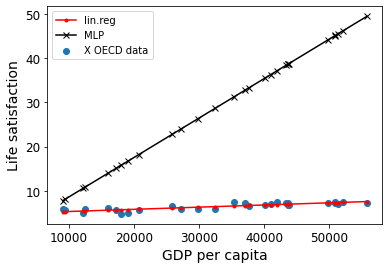

In [34]:
# Setup the MLP and lin. regression again..

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

def PlotModels(model1, model2, X, y, name_model1="lin.reg", name_model2="MLP"):

    # NOTE: local function is such a nifty feature of Python!
    def CalcPredAndScore(model1, model2, X, y):
        y_pred_model1 = model1.predict(X)
        y_pred_model2 = model2.predict(X)

        # call r2
        score_model1 = r2_score(y, y_pred_model1)
        score_model2 = r2_score(y, y_pred_model2)

        return y_pred_model1, y_pred_model2, score_model1, score_model2

    y_pred_model1, y_pred_model2, score_model1, score_model2 = CalcPredAndScore(
        model1, model2, X, y)

    plt.plot(X, y_pred_model1, "r.-")
    plt.plot(X, y_pred_model2, "kx-")
    plt.scatter(X, y)
    plt.xlabel("GDP per capita")
    plt.ylabel("Life satisfaction")
    plt.legend([name_model1, name_model2, "X OECD data"])

    print(f"{name_model1}.score(X, y)={score_model1:0.2f}")
    print(f"{name_model2}.score(X, y)={score_model2:0.2f}")


# lets make a linear and MLP regressor and redo the plots

mlp = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
linreg = LinearRegression()

mlp.fit(X, y)
linreg.fit(X, y)

print("The MLP mis-fits the data, seen in the bad R^2 score..")
PlotModels(linreg, mlp, X, y)

print("OK")

### Qa) Scaling an MLP with a custom min/max scaler

The first exercise consisted of implementing a custom version of the `MinMaxScaler` that has the same functionality but is done "manually". Our MinMaxScaler can be seen below, where it is also tested against the `MinMaxScaler` that ships with Sklearn.

From the code cell below it can be seen that our MinMaxScaler first checks that the input `v` is either a `list` or a `numpy.array`. Then it gets the minimum and maximum values from `v` and stores them in `min` and `max`. A new `list` is then generated that has been scaled based on the minimum and maximum. This is by iterating over `v` and by subtracting `min` from every `item`. This value is then divided by `max-min` and appended to the new vector `v_new`, which will be returned.

The small test at the bottom of the cell confirms that the functionality is practically identical, since the statement `fabs(myMinMaxS[i]-sklearnMinMaxS[i])<eps` never returns `True`. The statement `fabs(myMinMaxS[i]-sklearnMinMaxS[i])<eps` checks if the values differ between our MinMaxScaler and Sklearn's MinMaxScaler.


In [35]:
from sklearn.preprocessing import MinMaxScaler
from numpy import fabs

def MyMinMaxScaler(v):
    if isinstance(v, (type(list), type(np.array))):
        raise TypeError('input must be list or np.array')
    min = np.min(v)
    max = np.max(v)
    v_new = []
    for item in v:
        v_new.append((item-min)/(max-min))
    return v_new

scaler = MinMaxScaler()
scaler.fit(X)
sklearnMinMaxS = scaler.transform(X)
myMinMaxS = MyMinMaxScaler(X)

eps = 1E-9
for i in range(len(X)):
    assert fabs(myMinMaxS[i]-sklearnMinMaxS[i])<eps, f"Diff between myMinMaxS and sklearnMinMaxS: myMinMaxS[{i}]: {myMinMaxS[i]}, sklearnMinMaxS[{i}]: {sklearnMinMaxS[i]}"

print("OK")


OK


### Qb) Pipelines in our framework

In this exercise `Pipeline` from Scikit-learn was introduced. A pipeline had to be created, which scaled the data from X and then trained the `MLPRegressor` from the introduction. As a bonus the newly trained model was drawn.

From the results of the code cell below it can be seen that the MLP model scores much better when the data is scaled. (Compared to the other MLP data from the introduction)

Pipe (MLP scaled).score(X, y)=0.73
Linreg.score(X, y)=0.73


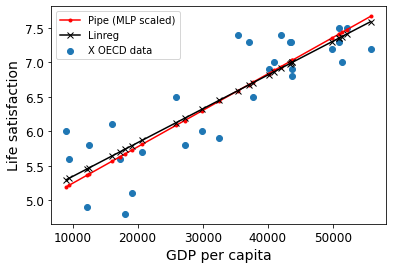

In [36]:
from sklearn.pipeline import Pipeline

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('mlp', mlp)
])

pipe.fit(X,y)
PlotModels(pipe, linreg, X, y, name_model1="Pipe (MLP scaled)", name_model2="Linreg")

### Qc) Outliers in different scalers

In this exercise the `MinMaxScaler` were to be compared to the `StandardScaler`. The results were to be compared to each other with outliers in mind.

A comparison of the results can be seen below the code cell.

Pipe1 (MLP, MinMax Scaled).score(X, y)=0.72
Pipe2 (MLP, StandardScaler).score(X, y)=0.79
Max in X: 55805.204000000005
Min in X: 9054.914
Mean in X: 33391.74913793103
Std in X: 14395.272687078264
 
2*Std+mean in X: 62182.29451208756
2*Std-mean in X: 4601.203763774502


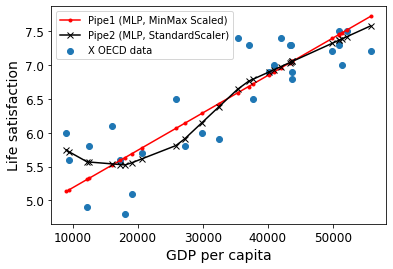

In [37]:
from sklearn.preprocessing import StandardScaler

mlp2 = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)

pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp2)
])
pipe.fit(X,y)
pipe2.fit(X,y)


PlotModels(pipe, pipe2, X, y, name_model1="Pipe1 (MLP, MinMax Scaled)", name_model2="Pipe2 (MLP, StandardScaler)")

print(f"Max in X: {X.max()}")
print(f"Min in X: {X.min()}")
print(f"Mean in X: {X.mean()}")
print(f"Std in X: {X.std()}")
print(" ")
print(f"2*Std+mean in X: {2*X.std()+X.mean()}")
print(f"2*Std-mean in X: {-2*X.std()+X.mean()}")

### Qc) continued:

There is a fundamental problem with mix-max scalers. The problem is that the scale will be heavily affected by outliers in cases where the outlier is significantly larger or smaller than the majority of the data-points.

After consulting lecturer "Henrik Daniel Kjeldsen" we were given a more statistical approach to determining whether there were outliers in the dataset.

In the code cell above it can be seen that the mean in X is $\approx33000$ and standard deviation of $\approx14000$. A general rule of thumb is to categorize an outlier as a data-point with values between $\pm2\cdot\sigma+\mu$, which is values between $\approx62000$ and $\approx4600$. Since the maximum and minimum is between these values it means that we do not have any significant outliers in the dataset.

To back up the point it can be seen from the scores that the models perform nearly identically. Pipe1 has a score $\approx0.72$ and Pipe2 has a score $\approx0.71$.

### Qd) Testing different hyperparameters

For the last exercise in L03: Pipelines the hyperparameters of the `MLPRegressor` were to be changed.

The code cell below simply creates an `MLPRegressor` similar to the one from exercise Qc. This will be the base model the future models will be compared to.

In [38]:
from sklearn.model_selection import train_test_split

X, y = LoadDataFromL01() # Reload data to be sure
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

mlp_og = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)

pipe_og = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp_og', mlp_og)
])

pipe_og.fit(X_train, y_train)
print("OK")


OK


### Qd) continued:

In the code cell below the parameter `hidden_layer_sizes` has been changed to 4 neurons instead of 10 and in the cell on step further down from 10 to 100.<br>
In the code cell where the amount of neurons has been reduced the score was 0.03 points lower than the base.<br>
In the code cell where the amount of neurons has been increased the score was 0.01 points lower than the base.

The results were quite surprising, since the amount of neurons seem to affect the score marginally compared to the groups expectations. It was also surprising that 100 neurons did not improve the performance.

pipe original.score(X, y)=0.81
new pipe.score(X, y)=0.74


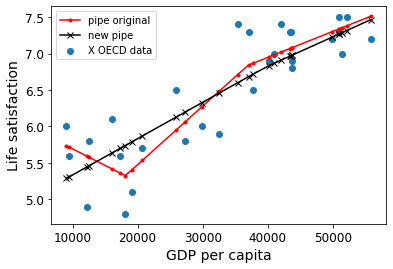

In [39]:
# hidden_layer = 2

mlp = MLPRegressor(hidden_layer_sizes=(4, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp)
])

pipe.fit(X, y)

PlotModels(pipe_og, pipe, X, y, name_model1="pipe original", name_model2="new pipe")

pipe original.score(X, y)=0.81
new pipe.score(X, y)=0.80


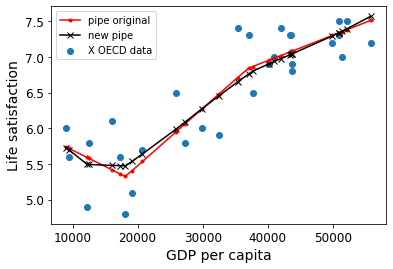

In [40]:
# hidden_layer = 100

mlp = MLPRegressor(hidden_layer_sizes=(100, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp)
])

pipe.fit(X, y)

PlotModels(pipe_og, pipe, X, y, name_model1="pipe original", name_model2="new pipe")

### Qd) continued:

In the code cell below the attribute `solver` has been changed to `sgd`. The solver indicates the loss function the model uses to calculate the loss when training. `sgd` is a stochastic gradiant descent.<br>
In the code cell one step further below the solver has been changed to `lbfgs`, which is another function for meassuring the loss function.

By running the code cells below it can be seen that changing the the loss function to `sdg` results in a score reduction of 0.08 points and changing to `lbfgs` did not result in a change.

pipe original.score(X, y)=0.81
new pipe.score(X, y)=0.78


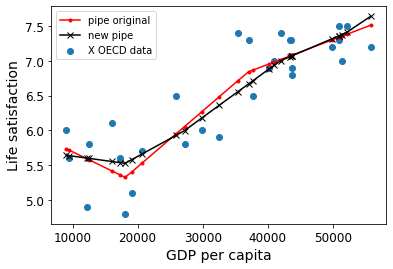

In [41]:
# hidden_layer = 10, solver = 'sgd' (stochastic gradiant descent)

mlp = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='sgd',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp)
])

pipe.fit(X, y)

PlotModels(pipe_og, pipe, X, y, name_model1="pipe original", name_model2="new pipe")

pipe original.score(X, y)=0.81
new pipe.score(X, y)=0.83


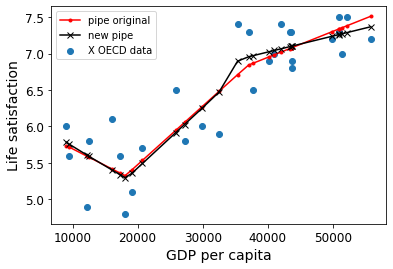

In [42]:
# hidden_layer = 10, solver = 'lbfgs' (stochastic gradiant descent)

mlp = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='lbfgs',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp)
])

pipe.fit(X, y)

PlotModels(pipe_og, pipe, X, y, name_model1="pipe original", name_model2="new pipe")

### Qd) continued:

In the code cell below the activation function has been changed to `identity`. This results in a score change of 0.08 points.

pipe original.score(X, y)=0.81
new pipe.score(X, y)=0.73


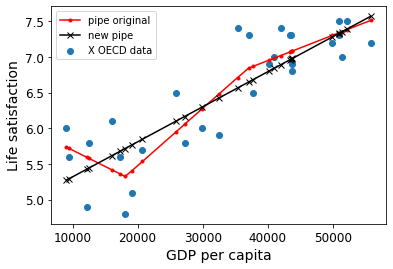

In [43]:
# hidden_layer = 10, activation='identity'

mlp = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='identity',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp)
])

pipe.fit(X, y)

PlotModels(pipe_og, pipe, X, y, name_model1="pipe original", name_model2="new pipe")